# Wyznaczanie współczynnika lepkości powietrza

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Wprowadzenie danych

In [2]:
data_seria_3 = [
    [9.5, 5.17], [9.0, 5.21], [8.4, 5.29], [8.0, 5.25], [7.4, 5.87],
    [6.9, 6.35], [6.3, 8.32], [5.9, 6.83], [5.3, 6.59], [4.8, 7.53],
    [4.3, 8.29], [3.8, 7.60], [3.3, 8.63]
]
numpy_seria_3 = np.array(data_seria_3)

# Separate columns for Seria 3
h_1 = numpy_seria_3[:, 0] # All rows, first column (index 0)
t_1 = numpy_seria_3[:, 1] # All rows, second column (index 1)

data_seria_4 = [
    [9.4, 5.17], [8.9, 5.82], [8.4, 5.76], [7.8, 6.17], [7.3, 6.78],
    [6.8, 6.93], [6.3, 6.99], [5.8, 9.17], [5.3, 9.50], [4.8, 7.12],
    [4.3, 7.61], [3.8, 8.89], [3.3, 9.17]
]
numpy_seria_4 = np.array(data_seria_4)

# Separate columns for Seria 4
h_2 = numpy_seria_4[:, 0] # All rows, first column (index 0)
t_2 = numpy_seria_4[:, 1] # All rows, second column (index 1)

## Podstawowe obliczenia oraz poprowadzenie regresji

In [3]:
# Obliczenie średniej wartości dla h i t
h = (h_1 + h_2) / 2
t = (t_1 + t_2) / 2

V_div_t1 = 100 / t_1 # Zależność V/t (wypływania objętości 100 cm³ w czasie t) dla serii 1
V_div_t2 = 100 / t_2 # Zależność V/t (wypływania objętości 100 cm³ w czasie t) dla serii 2
V_div_t = 100 / t # Zależność V/t (wypływania objętości 100 cm³ w czasie t)

print("Średnie wartości h:", h)
print("Średnie wartości t:", t)
print("Wartości V/t:", V_div_t)

# Regresja liniowa
wspolczynniki1 = np.polyfit(V_div_t1, h_1, 1)
prosta_regresji1 = np.poly1d(wspolczynniki1)

wspolczynniki2 = np.polyfit(V_div_t2, h_2, 1)
prosta_regresji2 = np.poly1d(wspolczynniki2)

wspolczynniki = np.polyfit(V_div_t, h, 1)
prosta_regresji = np.poly1d(wspolczynniki)

print("Regresja liniowa")
print(f"V/t={wspolczynniki[0]:.4f}*h + {wspolczynniki[1]:.4f}")

print("Regresja liniowa Seria 1")
print(f"V/t={wspolczynniki1[0]:.4f}*h + {wspolczynniki1[1]:.4f}")
print("Regresja liniowa Seria 2")
print(f"V/t={wspolczynniki2[0]:.4f}*h + {wspolczynniki2[1]:.4f}")

Średnie wartości h: [9.45 8.95 8.4  7.9  7.35 6.85 6.3  5.85 5.3  4.8  4.3  3.8  3.3 ]
Średnie wartości t: [5.17  5.515 5.525 5.71  6.325 6.64  7.655 8.    8.045 7.325 7.95  8.245
 8.9  ]
Wartości V/t: [19.34235977 18.13236627 18.09954751 17.51313485 15.81027668 15.06024096
 13.06335728 12.5        12.4300808  13.65187713 12.57861635 12.12856277
 11.23595506]
Regresja liniowa
V/t=0.6876*h + -3.7818
Regresja liniowa Seria 1
V/t=0.6235*h + -3.2734
Regresja liniowa Seria 2
V/t=0.6219*h + -2.4963


## Wizualizacja wyników

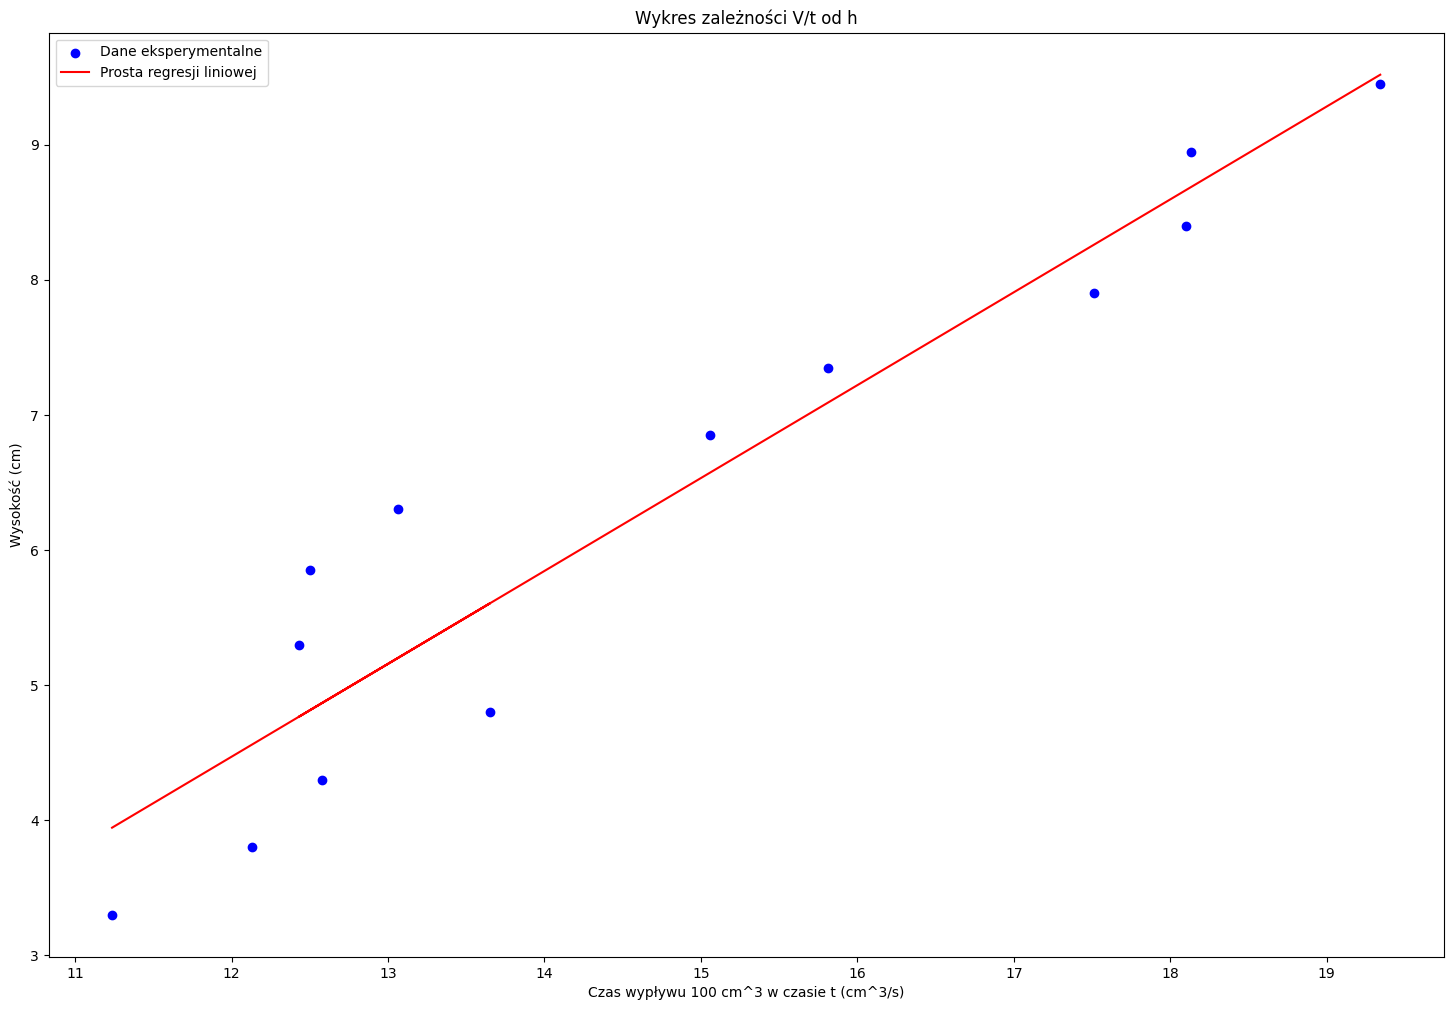

In [4]:
plt.figure(figsize=(18, 12))
plt.scatter(V_div_t, h, color='blue', label='Dane eksperymentalne')
plt.plot(V_div_t, prosta_regresji(V_div_t), color='red', label='Prosta regresji liniowej')
plt.title('Wykres zależności V/t od h')
plt.xlabel('Czas wypływu 100 cm^3 w czasie t (cm^3/s)')
plt.ylabel('Wysokość (cm)')
plt.legend()
plt.show()

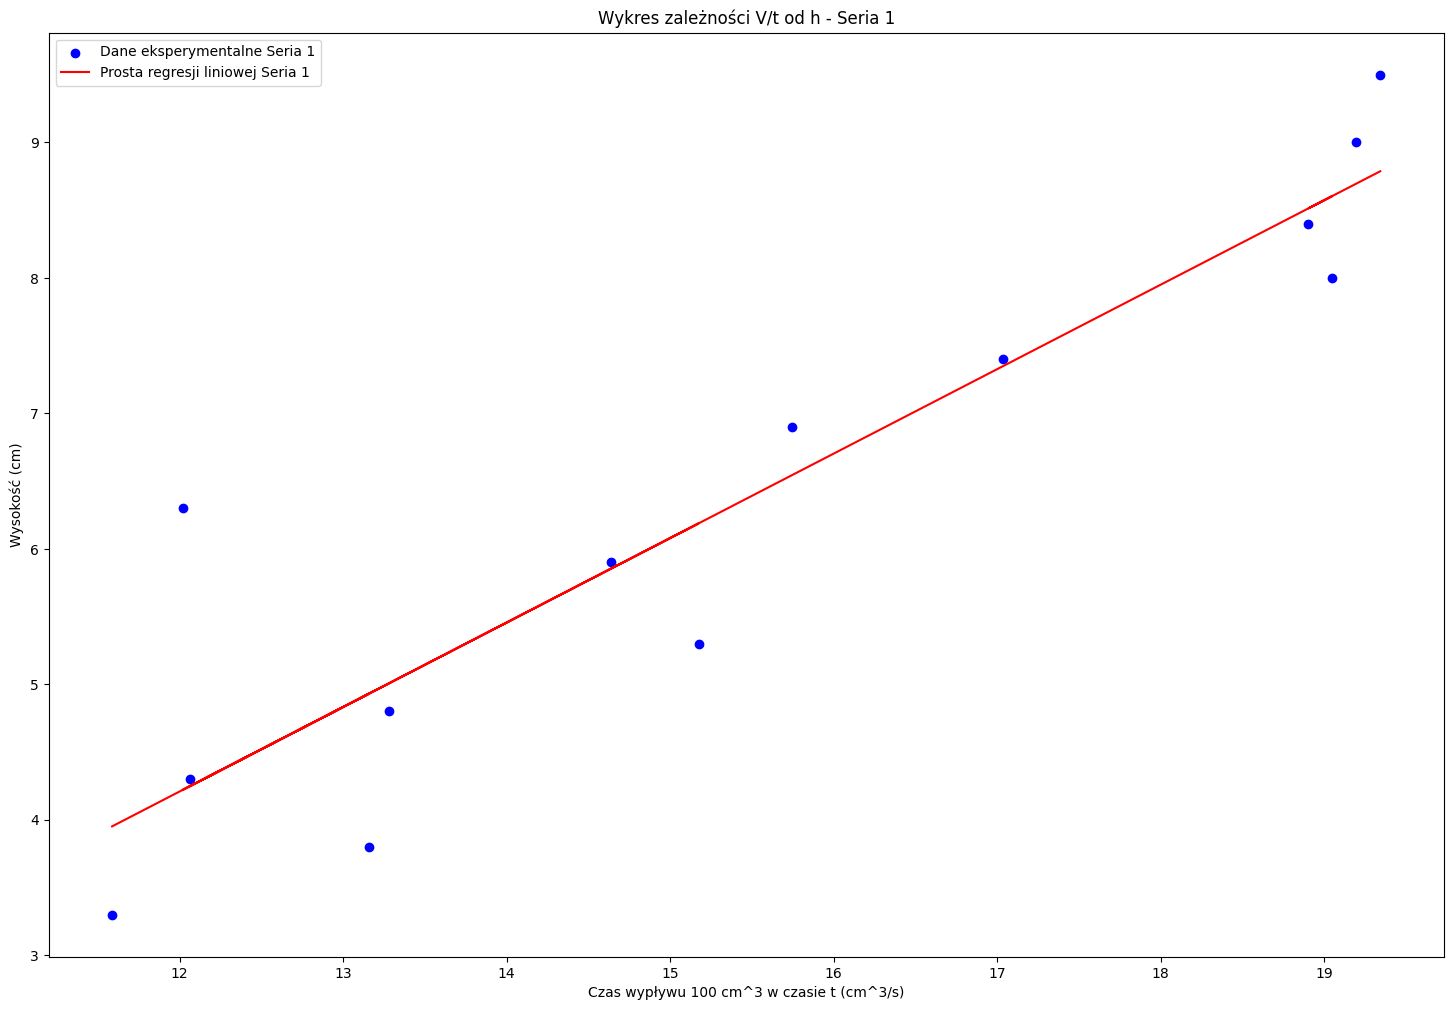

In [5]:
plt.figure(figsize=(18, 12))
plt.scatter(V_div_t1, h_1, color='blue', label='Dane eksperymentalne Seria 1')
plt.plot(V_div_t1, prosta_regresji1(V_div_t1), color='red', label='Prosta regresji liniowej Seria 1')
plt.title('Wykres zależności V/t od h - Seria 1')
plt.xlabel('Czas wypływu 100 cm^3 w czasie t (cm^3/s)')
plt.ylabel('Wysokość (cm)')
plt.legend()
plt.show()

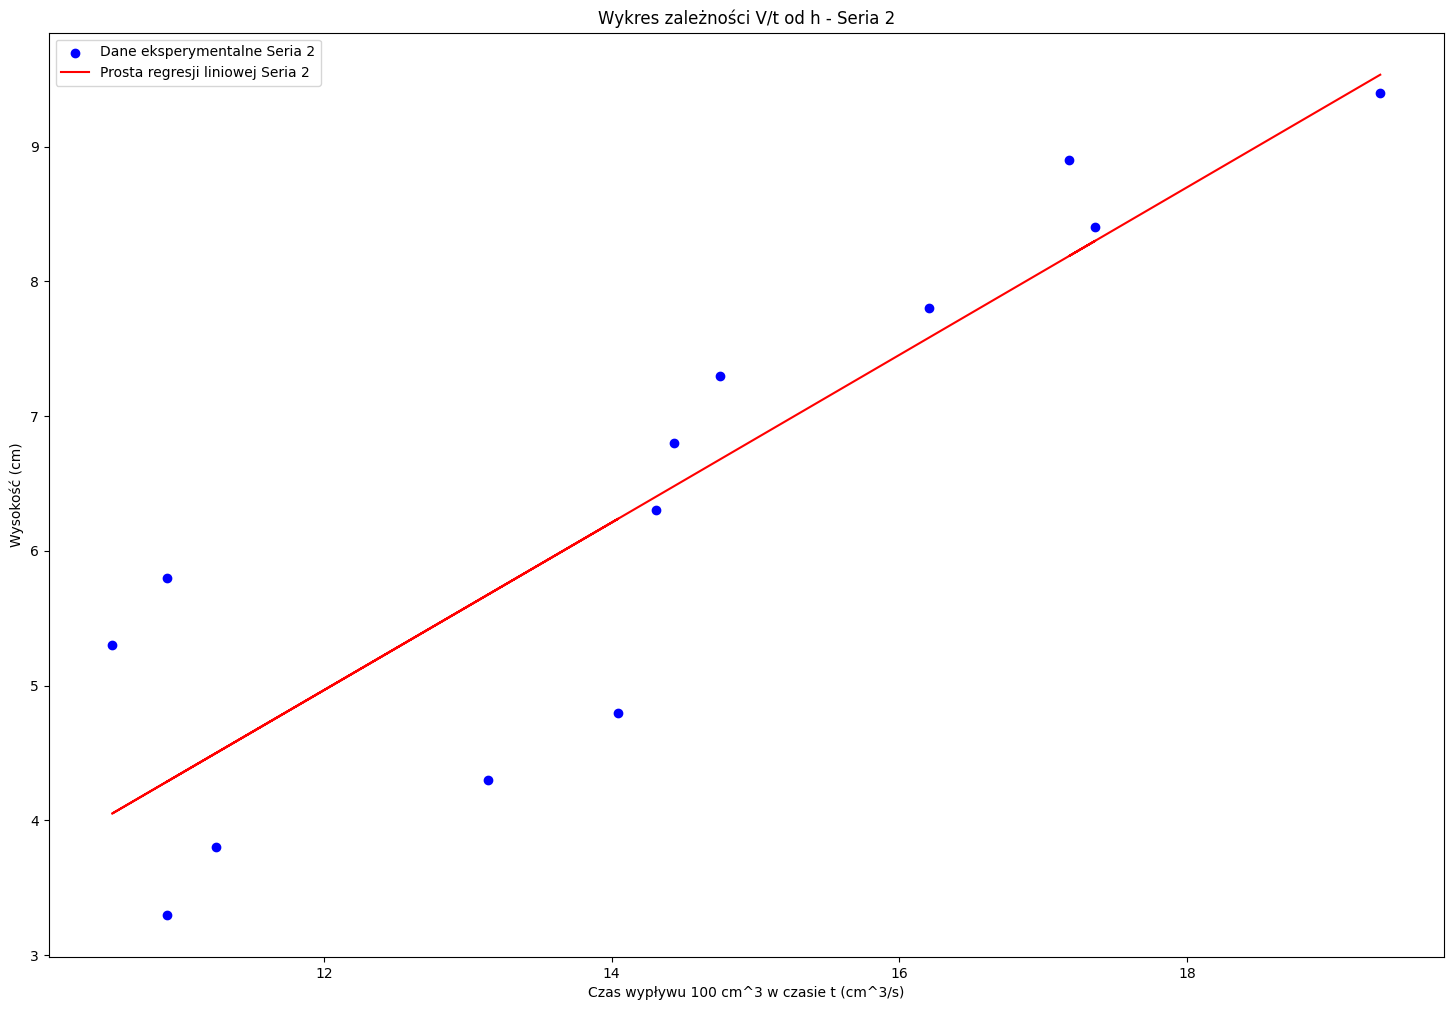

In [6]:
plt.figure(figsize=(18, 12))
plt.scatter(V_div_t2, h_2, color='blue', label='Dane eksperymentalne Seria 2')
plt.plot(V_div_t2, prosta_regresji2(V_div_t2), color='red', label='Prosta regresji liniowej Seria 2')
plt.title('Wykres zależności V/t od h - Seria 2')
plt.xlabel('Czas wypływu 100 cm^3 w czasie t (cm^3/s)')
plt.ylabel('Wysokość (cm)')
plt.legend()
plt.show()

## Niepewności pomiarowe

In [7]:
# Niepewności pomiarowe
delta_h = 0.1  # cm
delta_t = 0.1  # s

# Niepewność współczynników regresji liniowej
# Dla Serii 1
A1 = np.vstack([V_div_t1, np.ones(len(V_div_t1))]).T
wspolczynniki1, residuals1, rank1, s1 = np.linalg.lstsq(A1, h_1, rcond=None)
a1, b1 = wspolczynniki1
n1 = len(h_1)
sigma_y1 = np.sqrt(residuals1[0] / (n1 - 2))
delta_a1 = sigma_y1 / np.sqrt(np.sum((V_div_t1 - np.mean(V_div_t1))**2))
delta_b1 = sigma_y1 * np.sqrt(np.sum(V_div_t1**2) / (n1 * np.sum((V_div_t1 - np.mean(V_div_t1))**2)))

print("Niepewności współczynników regresji liniowej Seria 1:")
print(f"delta_a1: {delta_a1}, delta_b1: {delta_b1}")

# Dla Serii 2
A2 = np.vstack([V_div_t2, np.ones(len(V_div_t2))]).T
wspolczynniki2, residuals2, rank2, s2 = np.linalg.lstsq(A2, h_2, rcond=None)
a2, b2 = wspolczynniki2
n2 = len(h_2)
sigma_y2 = np.sqrt(residuals2[0] / (n2 - 2))
delta_a2 = sigma_y2 / np.sqrt(np.sum((V_div_t2 - np.mean(V_div_t2))**2))
delta_b2 = sigma_y2 * np.sqrt(np.sum(V_div_t2**2) / (n2 * np.sum((V_div_t2 - np.mean(V_div_t2))**2)))

print("Niepewności współczynników regresji liniowej Seria 2:")
print(f"delta_a2: {delta_a2}, delta_b2: {delta_b2}")

# Dla średnich wartości
A = np.vstack([V_div_t, np.ones(len(V_div_t))]).T
wspolczynniki, residuals, rank, s = np.linalg.lstsq(A, h, rcond=None)
a, b = wspolczynniki
n = len(h)
sigma_y = np.sqrt(residuals[0] / (n - 2))
delta_a = sigma_y / np.sqrt(np.sum((V_div_t - np.mean(V_div_t))**2))
delta_b = sigma_y * np.sqrt(np.sum(V_div_t**2) / (n * np.sum((V_div_t - np.mean(V_div_t))**2)))

print("Niepewności współczynników regresji liniowej dla średnich wartości:")
print(f"delta_a: {delta_a}, delta_b: {delta_b}")

# Prawo przenoszenia niepewności maksymalnej

Niepewności współczynników regresji liniowej Seria 1:
delta_a1: 0.08287399317125706, delta_b1: 1.3041442559786962
Niepewności współczynników regresji liniowej Seria 2:
delta_a2: 0.09968263042797079, delta_b2: 1.4389687122713506
Niepewności współczynników regresji liniowej dla średnich wartości:
delta_a: 0.07028616398585633, delta_b: 1.0521891800933634
